In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

In [ ]:
df=pd.read_csv("/content/obesity_data.csv")

In [ ]:
df.head(4)

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight


<h3>🔢 Encoding Categorical Columns</h3>

<p>
Categorical variables were converted into numerical form to make them suitable for machine learning models.
</p>

<ul>
  <li>
    <strong>Gender Encoding:</strong><br>
    Male → 0, Female → 1
  </li>

  <li>
    <strong>Obesity Category Encoding (Target Variable):</strong>
    <pre>
Normal weight       → 0
Overweight          → 1
Obese               → 2
Underweight         → 3
Extremely obese     → 4
Insufficient weight → 5
    </pre>
  </li>
</ul>




In [ ]:
gender_mapping = {'Male': 0, 'Female': 1}
df['Gender'] = df['Gender'].map(gender_mapping)

obesity_category_mapping = {
    'Normal weight': 0,
    'Overweight': 1,
    'Obese': 2,
    'Underweight': 3,
    'Extremely obese': 4,
    'Insufficient weight': 5
}
df['ObesityCategory'] = df['ObesityCategory'].map(obesity_category_mapping)

print(df.head())

   Age  Gender      Height     Weight        BMI  PhysicalActivityLevel  \
0   56       0  173.575262  71.982051  23.891783                      4   
1   69       0  164.127306  89.959256  33.395209                      2   
2   46       1  168.072202  72.930629  25.817737                      4   
3   32       0  168.459633  84.886912  29.912247                      3   
4   60       0  183.568568  69.038945  20.487903                      3   

   ObesityCategory  
0                0  
1                2  
2                1  
3                1  
4                0  


<h2>📊 Feature Selection for ObesityCategory Prediction</h2>

<h3>🎯 Target (Output) Column</h3>
<ul>
  <li><b>ObesityCategory</b></li>
</ul>

<h3>✅ Input (Feature) Columns</h3>
<p>These columns have meaningful physiological or logical relevance to obesity, even if linear correlation is weak (important for ML models):</p>
<ul>
  <li><b>BMI</b> – Strongly related to obesity by definition</li>
  <li><b>Weight</b> – High correlation with BMI (0.86)</li>
  <li><b>Height</b> – Helps contextualize weight and BMI</li>
  <li><b>PhysicalActivityLevel</b> – Important lifestyle factor</li>
  <li><b>Age</b> – Can influence metabolism and body composition</li>
  <li><b>Gender</b> – Biological differences may affect obesity patterns</li>
</ul>

<h3>❌ Columns to Exclude</h3>
<p>No columns need to be strictly removed, but be cautious:</p>
<ul>
  <li><b>BMI & Weight together</b> – High multicollinearity; consider removing one for linear models</li>
</ul>


<h3>📌 Suggested Feature Sets</h3>

<h4>✔️ For Tree-Based / ML Models</h4>
<pre>
Age, Gender, Height, Weight, BMI, PhysicalActivityLevel
</pre>

<h4>✔️ For Linear Models</h4>
<pre>
Age, Gender, Height, BMI, PhysicalActivityLevel
</pre>




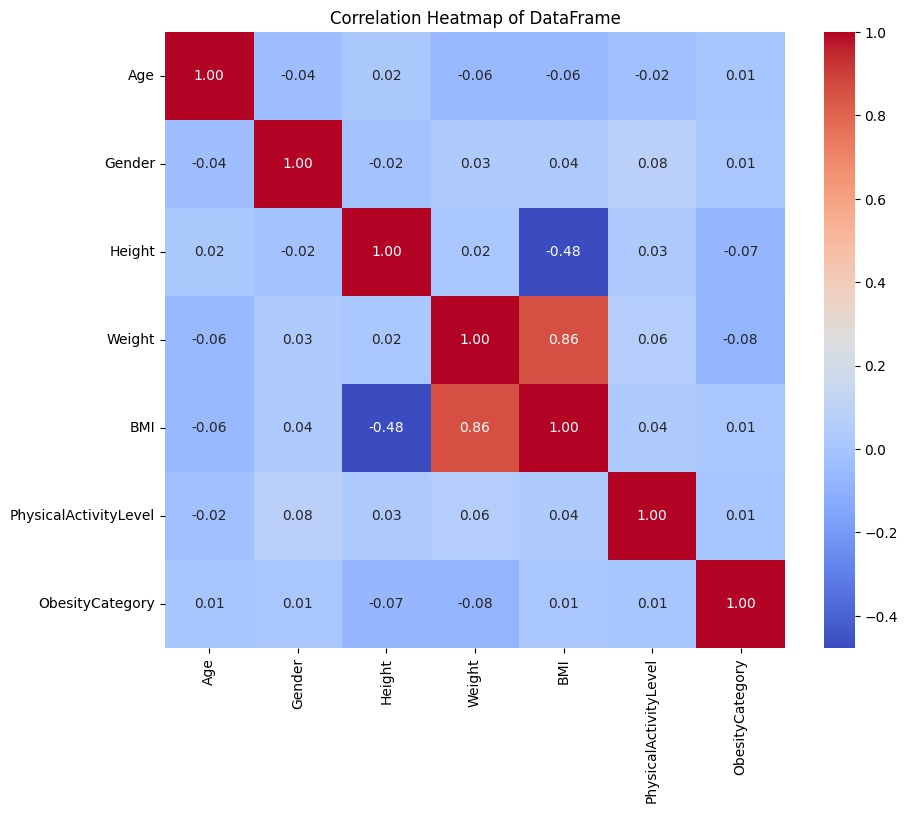

In [ ]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of DataFrame')
plt.show()

<h2>⚖️ Handling Class Imbalance</h2>

<ul>
  <li>📊 The dataset originally contained <strong>570 samples</strong>.</li>
  <li>🔼 To address class imbalance, an <strong>over-sampling technique</strong> was applied.</li>
  <li>🧪 <strong>Random Over Sampling</strong> was used to increase the dataset size.</li>
  <li>🎯 The total number of samples was increased to <strong>1000</strong>.</li>
  <li>⚖️ The target classes were balanced to ensure equal representation.</li>
</ul>

<p>✅ The final dataset size after applying the imbalance technique is <strong>(1000, n_features)</strong>.</p>


In [ ]:
input_columns = df.drop('ObesityCategory', axis=1)
output_columns = df['ObesityCategory']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    input_columns, output_columns,
    test_size=0.2,
    random_state=42,
    stratify=output_columns
)


In [ ]:


ros = RandomOverSampler(random_state=42)

X_train_resampled, y_train_resampled = ros.fit_resample(
    X_train, y_train
)

<h2>📏 Feature Scaling using StandardScaler</h2>

<ul>
  <li>🔢 Feature scaling was performed using <strong>StandardScaler</strong>.</li>
  <li>📐 StandardScaler transforms features to have:
    <ul>
      <li>Mean = 0</li>
      <li>Standard Deviation = 1</li>
    </ul>
  </li>
  <li>⚖️ This ensures all features are on the same scale.</li>
  <li>🚀 Scaling improves the performance of distance-based and gradient-based models.</li>
</ul>

<p><strong>Formula used:</strong></p>

<pre>
z = (x − μ) / σ
</pre>

<p>✅ StandardScaler was applied only to the <strong>feature variables</strong>, not the target column.</p>


In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


<h3>🌲 Classification Algorithm: Random Forest</h3>

<p>
Random Forest is an ensemble-based classification algorithm that builds multiple decision trees and combines their predictions to improve accuracy and reduce overfitting.
</p>

<ul>
  <li>Each tree is trained on a random subset of the training data.</li>
  <li>Final prediction is made using majority voting.</li>
  <li>It handles non-linear relationships effectively.</li>
  <li>It is robust to noise and overfitting.</li>
</ul>

<p>
Random Forest was selected as the final algorithm due to its superior classification performance.
</p>


In [ ]:
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    random_state=42
)

model.fit(X_train_scaled, y_train_resampled)


RandomForestClassifier(max_depth=20, random_state=42)

In [ ]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.995

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        74
           1       0.98      1.00      0.99        59
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        29

    accuracy                           0.99       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      0.99      1.00       200



In [ ]:
import pickle

# Save scaler
with open("standard_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save model
with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Load scaler
with open("standard_scaler.pkl", "rb") as f:
    loaded_scaler = pickle.load(f)

# Load model
with open("random_forest_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Example prediction
sample = X_test.iloc[:1]
sample_scaled = loaded_scaler.transform(sample)
prediction = loaded_model.predict(sample_scaled)

print("Predicted class:", prediction)


Predicted class: [0]


In [ ]:
pipeline = Pipeline([
    ('scaler', scaler),   # already fitted scaler
    ('model', model)      # already trained model
])

In [ ]:
with open("obesity_data_pipline.pkl", "wb") as f:
    pickle.dump(pipeline, f)
